<a href="https://colab.research.google.com/github/visithraravi98-lang/kmeansclustering/blob/main/analyzingKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

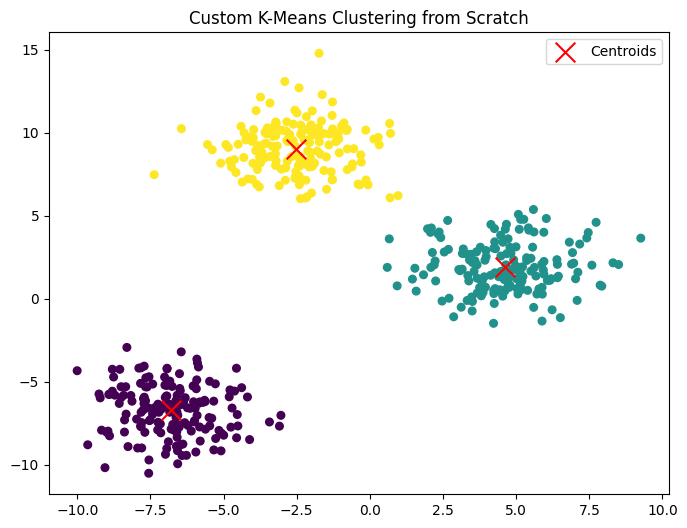

In [2]:
# Data Generation
x, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.5, n_features=2, random_state=42)

#Kmeans from scratch
class KMeansScratch:
  def __init__(self, k=3, max_iters=100, tol=1e-4):
    self.k = k
    self.max_iters = max_iters
    self.tol = tol

  def initialize_centroids(self, x):
    indices = np.random.choice(len(x), self.k, replace=False)
    return x[indices]

  def assign_clusters(self, x, centroids):
    distances = np.linalg.norm(x[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

  def update_centroids(self, x, labels):
    return np.array([x[labels == i].mean(axis=0) for i in range(self.k)])

  def compute_sse(self, x, centroids, labels):
    sse = 0
    for i in range(self.k):
      cluster_points = x[labels == i]
      sse += np.sum((cluster_points - centroids[i])**2)
    return sse

  def fit(self, x):
    self.centroids = self.initialize_centroids(x)
    for i in range(self.max_iters):
      labels = self.assign_clusters(x, self.centroids)
      new_centroids = self.update_centroids(x, labels)
      if np.linalg.norm(self.centroids - new_centroids) < self.tol:
        break
      self.centroids = new_centroids
    self.labels_ = labels
    self.sse_ = self.compute_sse(x, self.centroids, self.labels_)

#Apply custom K-Means
custom_kmeans = KMeansScratch(k=3)
custom_kmeans.fit(x)

#Visualization
plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:, 1],c=custom_kmeans.labels_,cmap='viridis',s=30)
plt.scatter(custom_kmeans.centroids[:, 0],custom_kmeans.centroids[:, 1],c='red',marker='x',s=200,label='Centroids')
plt.title('Custom K-Means Clustering from Scratch')
plt.legend()
plt.show()

In [3]:
#comparison with sklearn
sk_kmeans = KMeans(n_clusters=3,random_state=42,n_init=10)
sk_kmeans.fit(x)
print("Custom K-Means SSE:",custom_kmeans.sse_)
print("Scikit-learn k-Means SSE:",sk_kmeans.inertia_)

Custom K-Means SSE: 2150.2110225351644
Scikit-learn k-Means SSE: 2150.211022535164
